In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions,histfit

%matplotlib inline
# sns.set_theme(style = "ticks")

In [14]:
df = pd.read_excel('../Data-gathering/Json/Final_Dataset.xlsx')
df = df.drop(['Index',
           'Date',
           'index',
           'Author name',
           'University',
           'country',
           'Google Scholar link of the university',
          'Google Scholar link of the author',
          'Qs uni world ranking',
          'Qs uni country ranking',
          'Date of the first publication (year)',
          'Date of the last publication (year)'], axis=1)

In [15]:
statistical = []
for col in df.columns:
    statistical_par = {
            'Minimum': round(df[col].min(),2),
            'Maximum': round(df[col].max(),2),
            'Median':  round(df[col].median(),2),
            'Mean':    round(df[col].mean(),2),
            'STD':     round(df[col].std(),2),
            'Variance':round(df[col].var(),2)
        }
    statistical.append(statistical_par)
pd.DataFrame(
    statistical, 
    index = df.columns
)

,Minimum,Maximum,Median,Mean,STD,Variance
Citation,1.00,744199.00,4430.00,12736.63,25005.69,6.252848e+08
h-index,1.00,299.00,31.00,39.42,30.95,9.576000e+02
i10-index,0.00,1904.00,64.00,108.17,138.08,1.906524e+04
No. Of Publications,1.00,3000.00,158.00,259.08,313.96,9.856858e+04
No. Of publications without citation,0.00,1807.00,43.00,84.78,127.12,1.615879e+04
Uncited rate,0.00,0.96,0.30,0.31,0.14,2.000000e-02
No.Of US pattent,0.00,716.00,0.00,1.87,11.88,1.411900e+02
Patents and Publications balance,0.00,0.95,0.00,0.01,0.02,0.000000e+00
The most citation,1.00,126878.00,466.00,1847.44,4961.78,2.461924e+07
The most citation density,0.01,1.00,0.13,0.18,0.16,3.000000e-02


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11941 entries, 0 to 11940
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Citation                              11941 non-null  int64  
 1   h-index                               11941 non-null  int64  
 2   i10-index                             11941 non-null  int64  
 3   No. Of Publications                   11941 non-null  int64  
 4   No. Of publications without citation  11941 non-null  int64  
 5   Uncited rate                          11941 non-null  float64
 6   No.Of US pattent                      11941 non-null  int64  
 7   Patents and Publications balance      11941 non-null  float64
 8   The most citation                     11941 non-null  int64  
 9   The most citation density             11941 non-null  float64
 10  Sum of top 10 citations               11941 non-null  int64  
 11  Sum of top 10 c

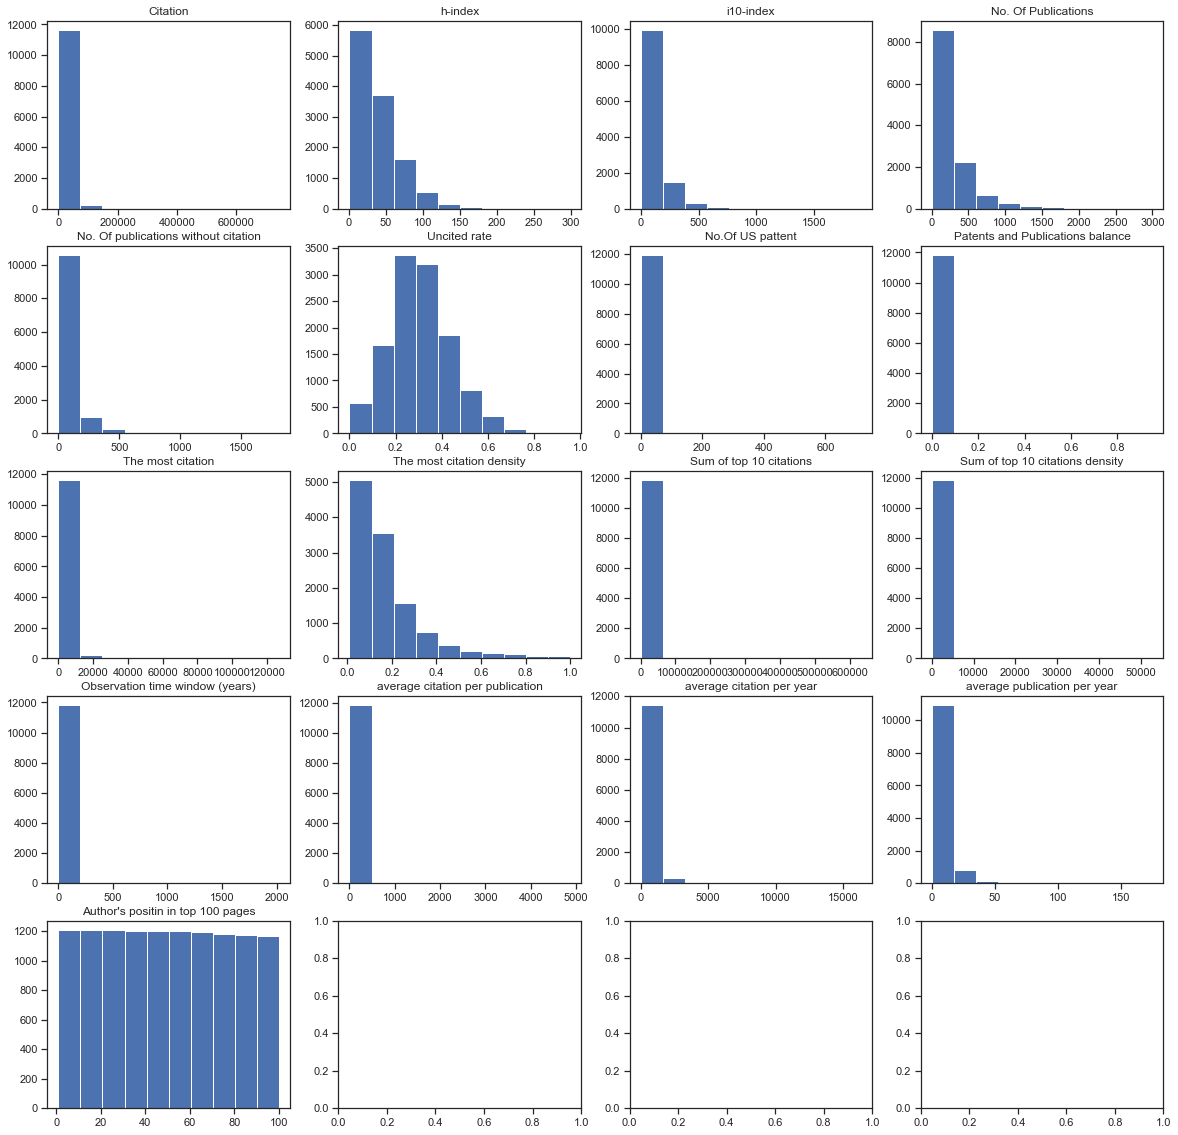

In [22]:
fig, ax = plt.subplots(nrows=5, ncols=4, figsize=(20, 20))
i = 0
j = 0
for col in df.columns:
    if j == 4:
        i += 1
        j = 0
    ax[i, j].set(title = col)
    ax[i, j].hist(df[col])
    j += 1

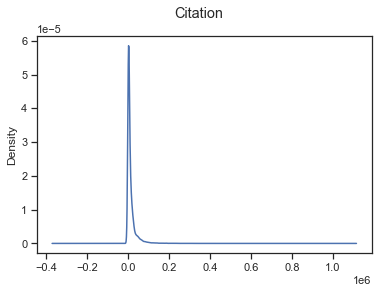

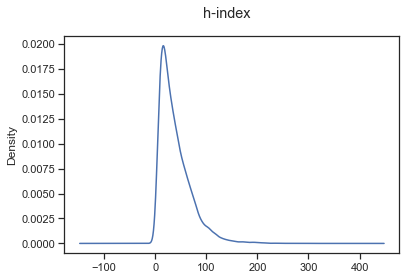

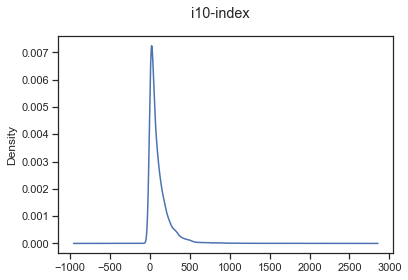

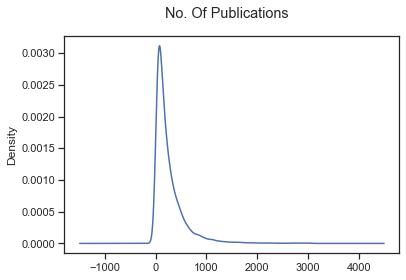

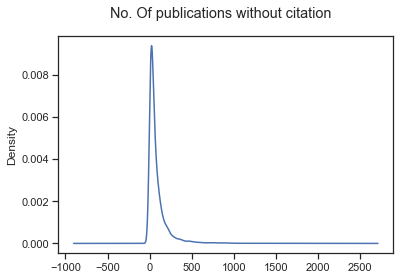

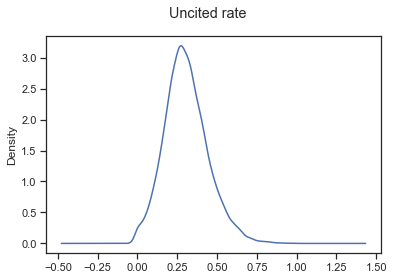

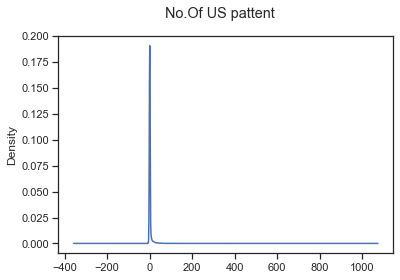

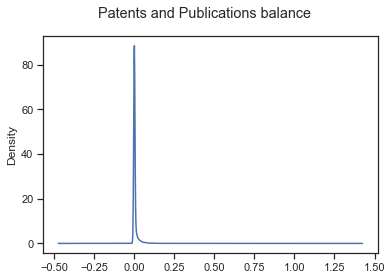

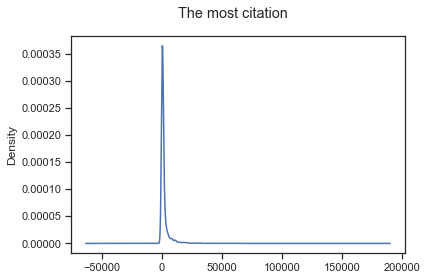

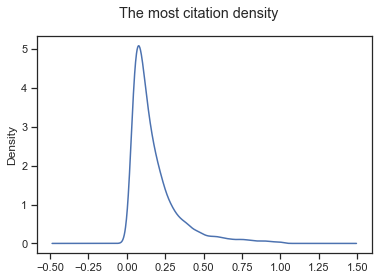

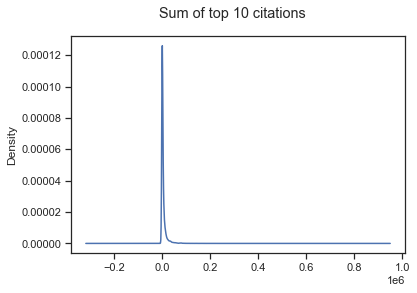

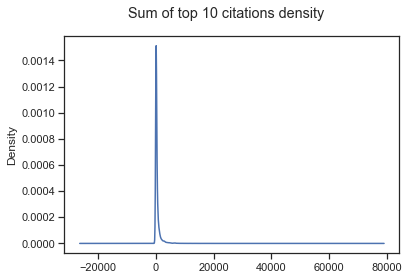

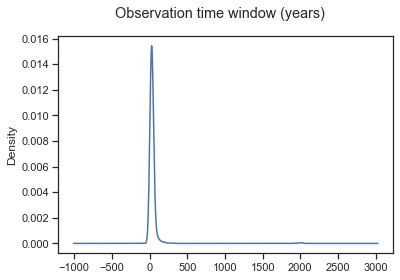

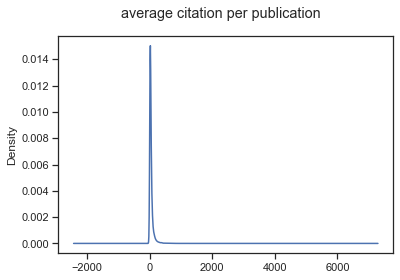

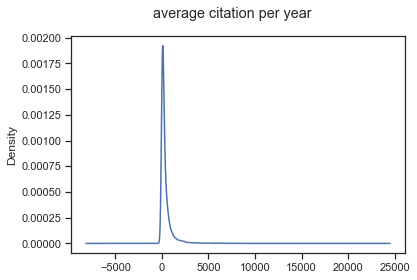

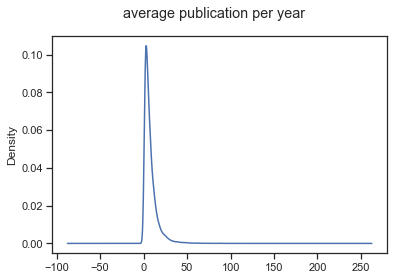

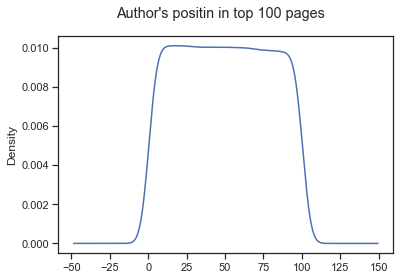

In [6]:
for col in df.columns:
    df[col].plot(kind='density',subplots=True, title = col)
    plt.show();

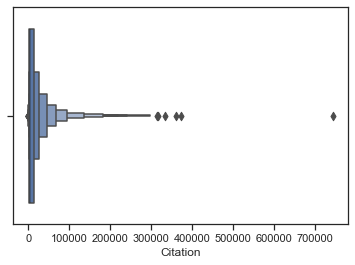

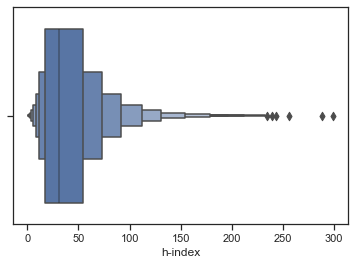

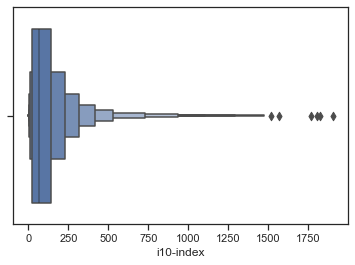

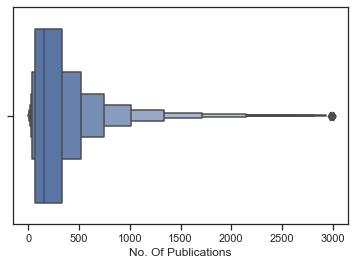

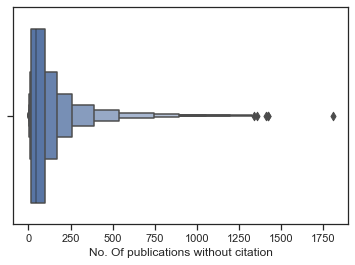

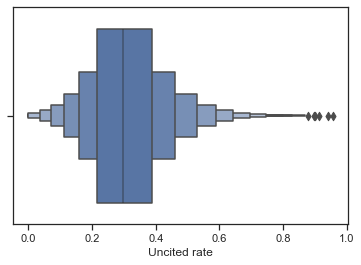

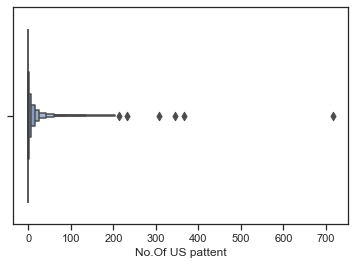

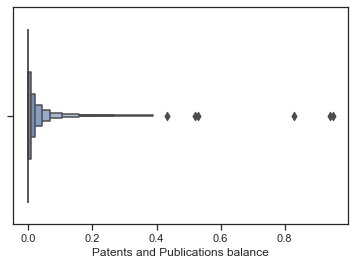

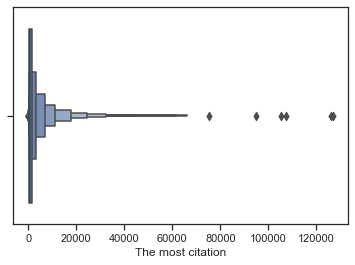

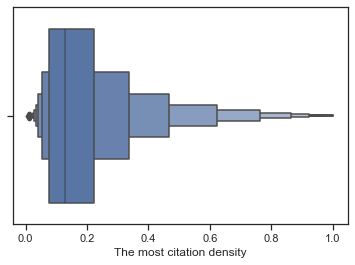

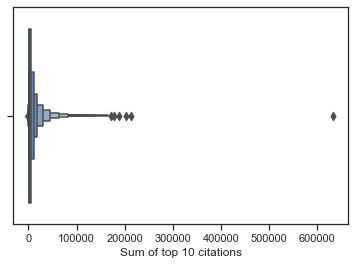

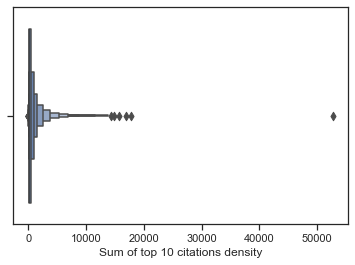

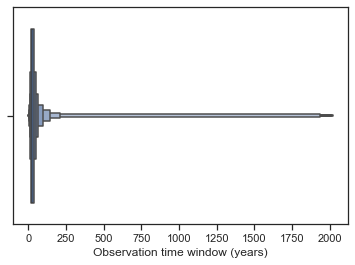

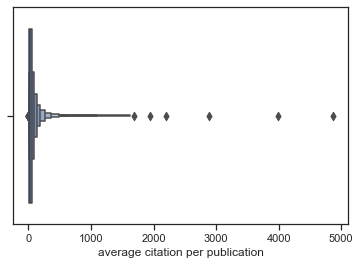

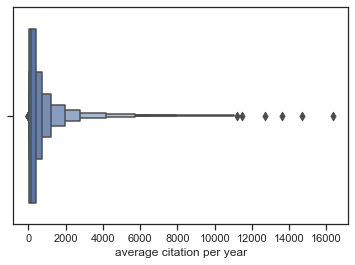

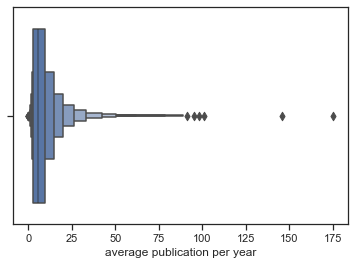

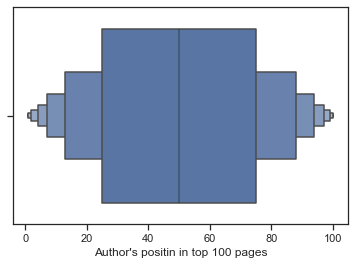

In [54]:
for col in df.columns:
    sns.boxenplot(x = df[col])
    plt.show()

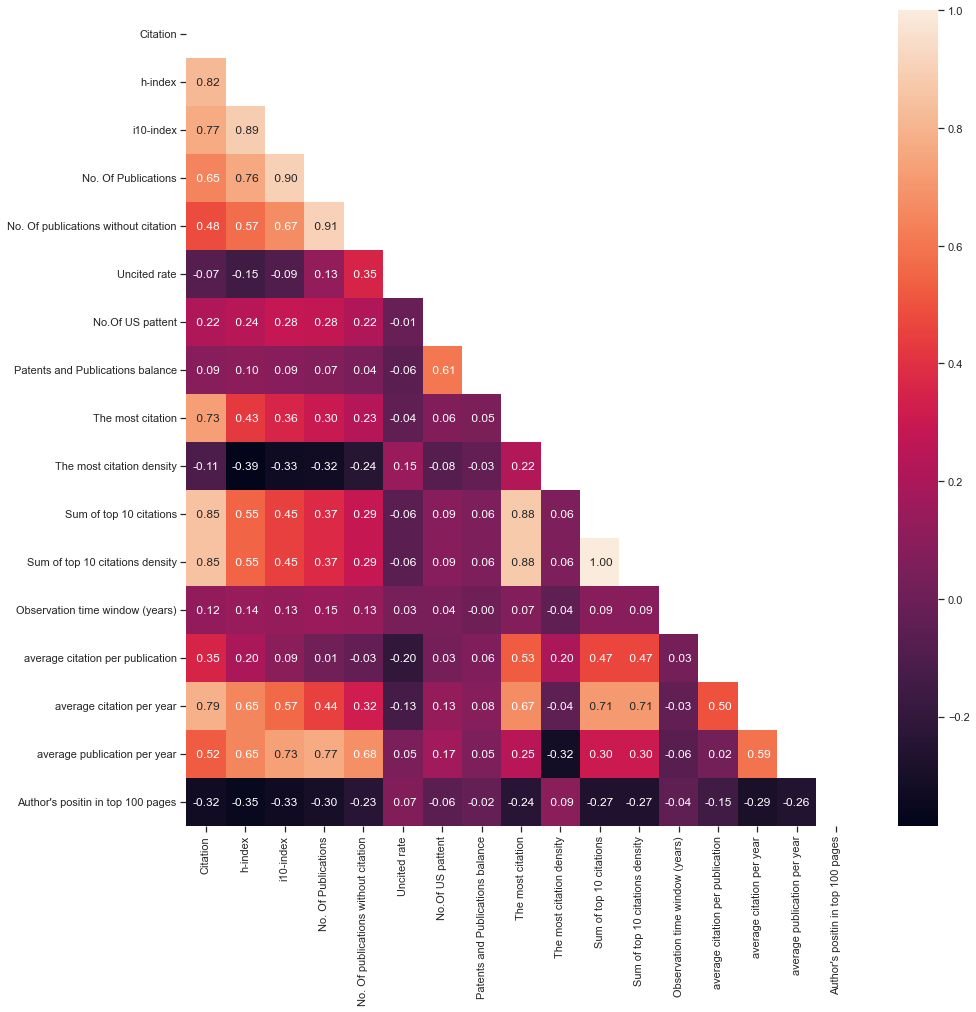

In [60]:
plt.figure(figsize=(15,15))
corrMatrix = df.corr()
matrix = np.triu(corrMatrix)
sns.heatmap(corrMatrix, annot=True, fmt="5.2f", mask=matrix)
plt.show()

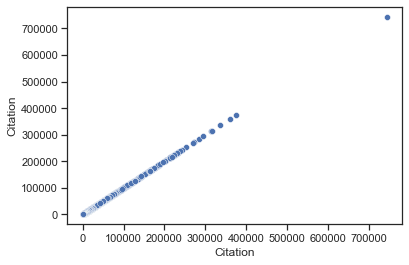

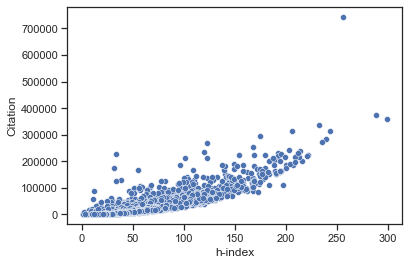

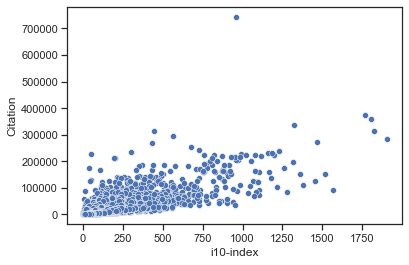

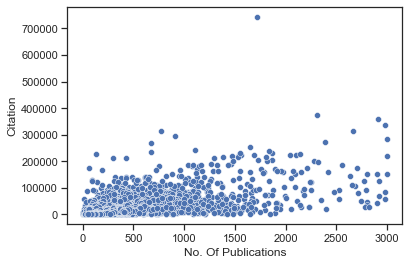

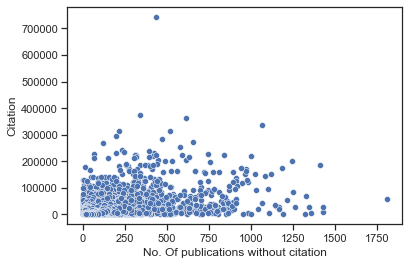

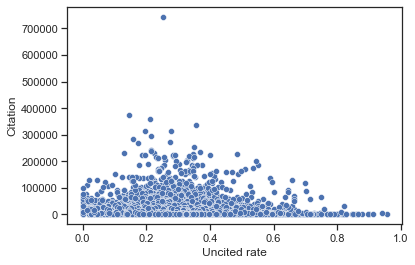

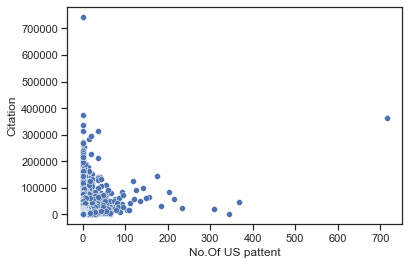

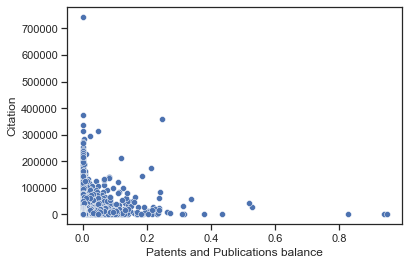

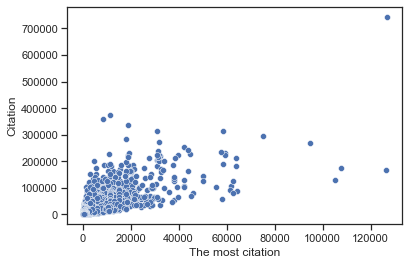

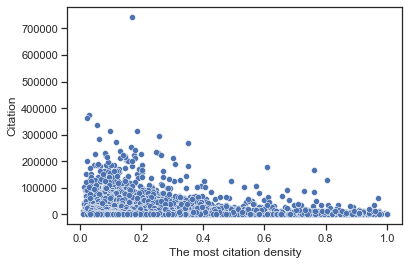

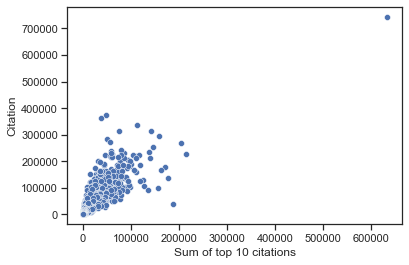

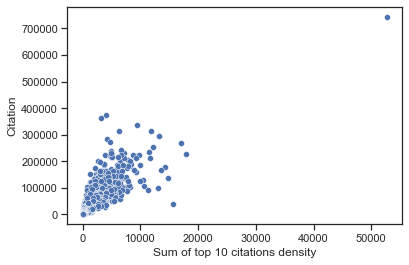

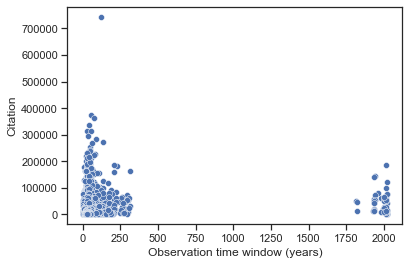

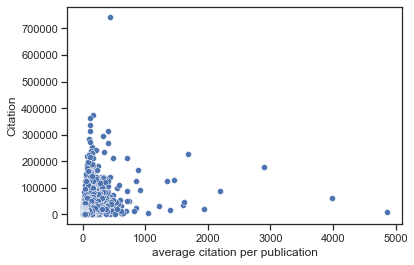

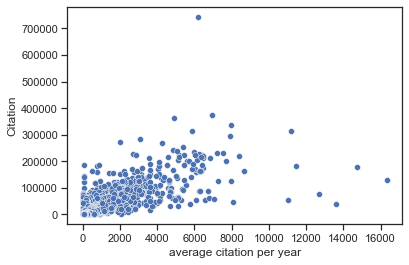

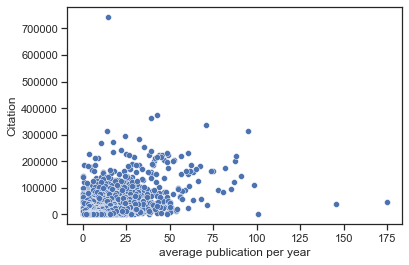

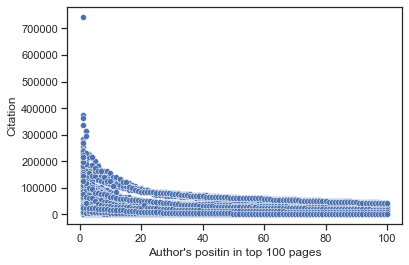

In [64]:
for col in df.columns:
    sns.scatterplot(data=df, x=col, y = 'Citation')
    plt.show()